In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [10]:
SP = pd.read_csv('data/^GSPC.csv').dropna()
SP = SP[['Date', 'Close']]
TR = pd.read_csv('data/^TNX.csv').dropna()
TR = TR[['Date', 'Close']]
x = pd.merge(SP, TR, how='left', on='Date')
x.Close_y = x.Close_y.fillna(method='ffill')
x = x.dropna()

In [11]:
x.index = pd.to_datetime(x.Date)
# x = x.drop('Date', axis=1)
df = x.rename(columns={'Close_x': 'sp', 'Close_y': 'tr'})
df.head()

,Date,sp,tr
Date,,,
1962-01-02,1962-01-02,70.959999,4.06
1962-01-03,1962-01-03,71.129997,4.03
1962-01-04,1962-01-04,70.639999,3.99
1962-01-05,1962-01-05,69.660004,4.02
1962-01-08,1962-01-08,69.120003,4.03


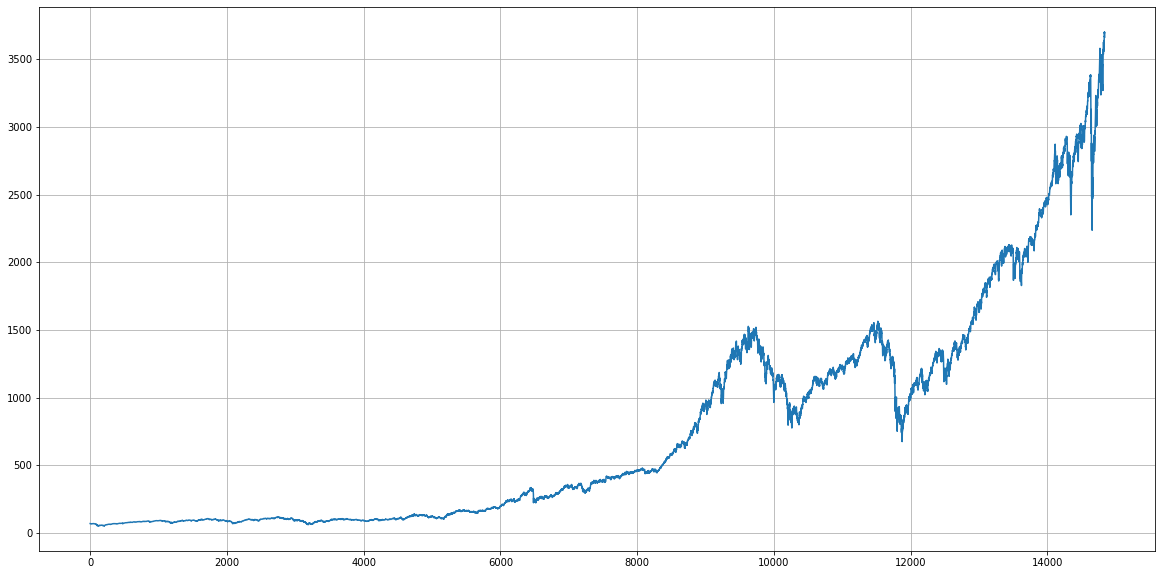

In [19]:
plt.figure(figsize=(20,10))
plt.plot(np.array(df.sp))
plt.grid()

In [ ]:
scale = {0: 100, 2000: 100, 4000: 250, 6000: 500, 8000: 1600, 10000: 1600, 12000: 2500, 14000: 3800}

In [22]:
for i in range(0, 14000, 2000):
    print(i, np.array(df.sp)[i])

0 70.959999
2000 89.949997
4000 92.5
6000 198.71000700000002
8000 469.5
10000 1003.4500119999999
12000 994.75


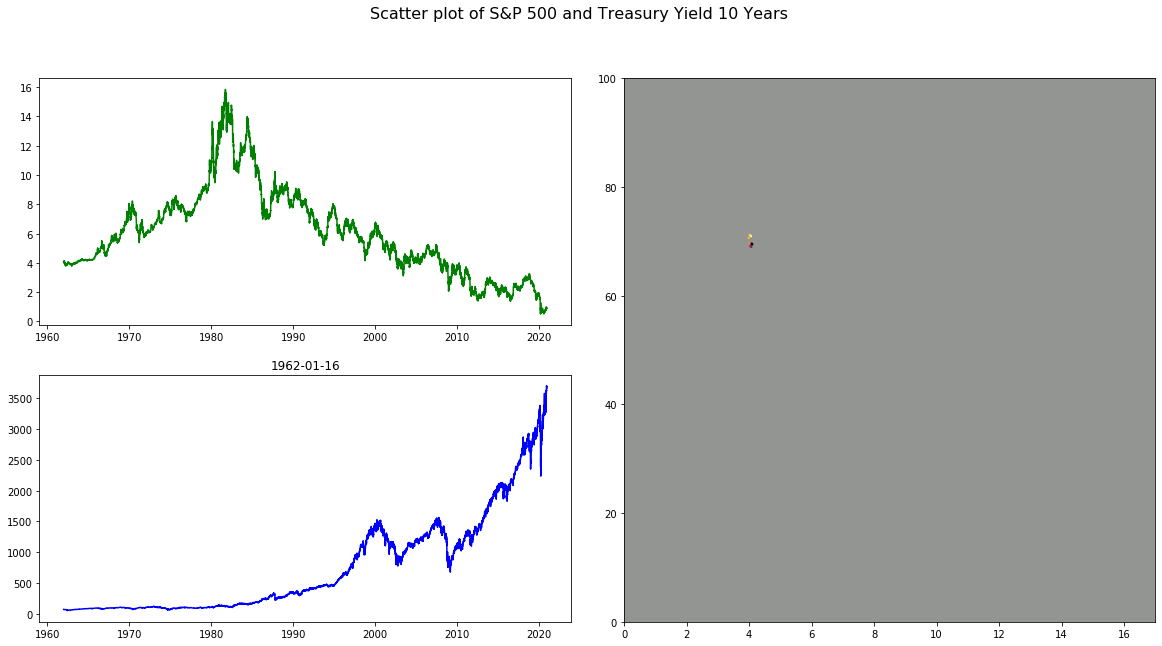

<Figure size 432x288 with 0 Axes>

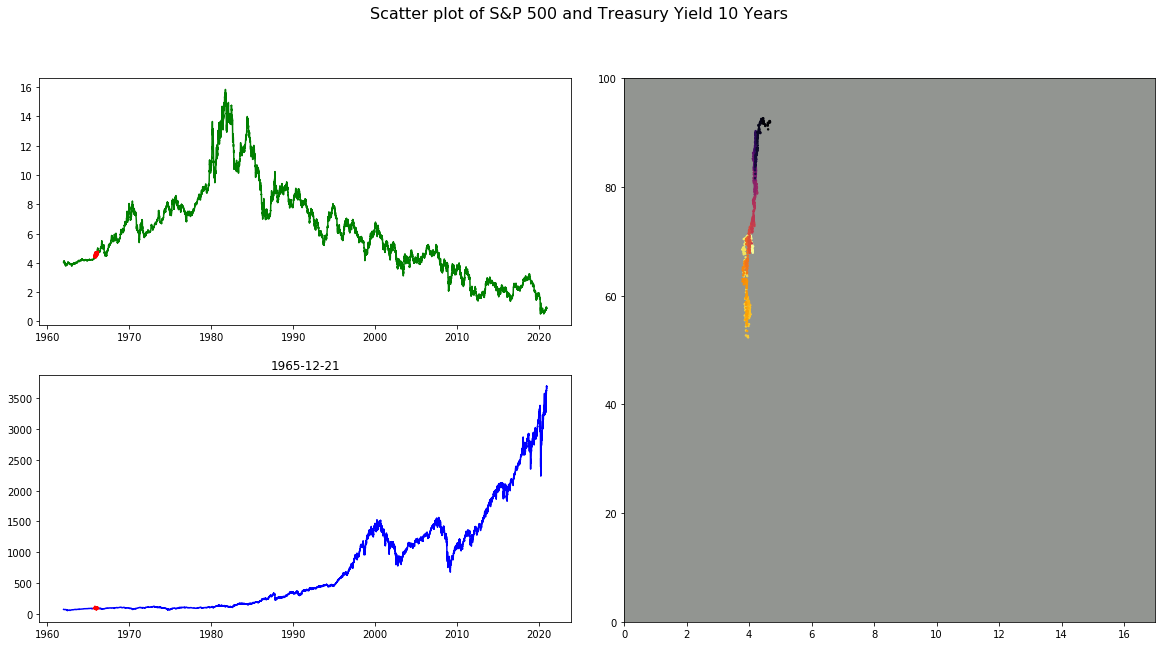

<Figure size 432x288 with 0 Axes>

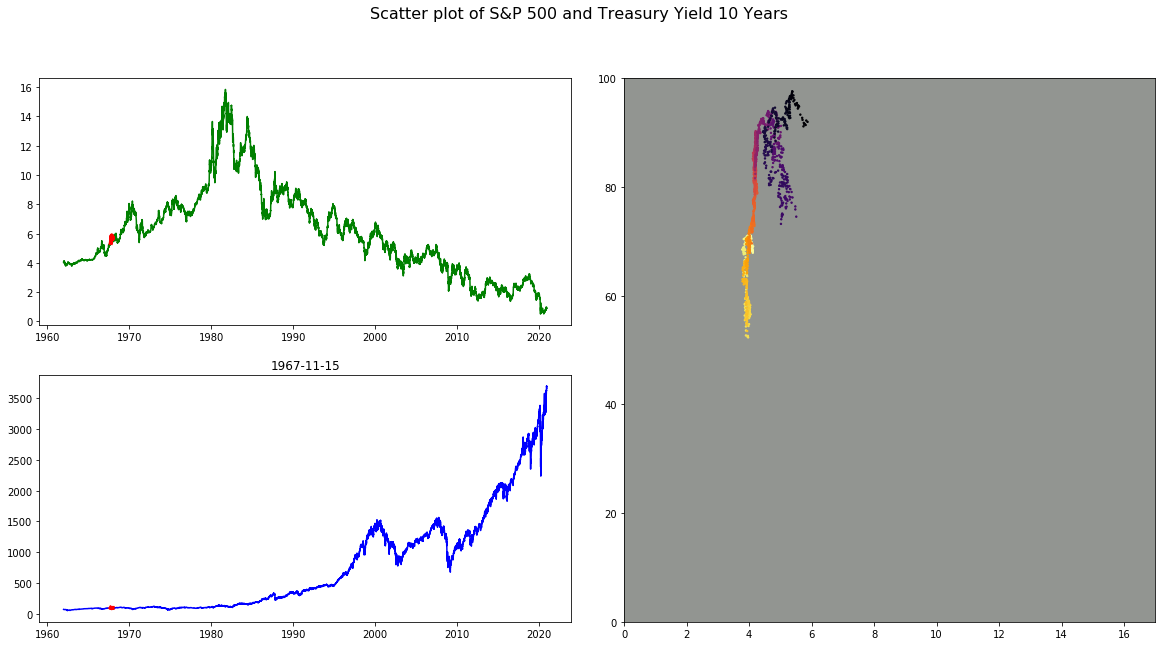

<Figure size 432x288 with 0 Axes>

In [26]:
scale = {0: 100, 2000: 100, 4000: 250, 6000: 500, 8000: 1600, 10000: 1600, 12000: 2500, 14000: 3800}
scale_y = 100
win = 30


for i in (10, 1000, 1480):
    fig, ax = plt.subplots(nrows=2, ncols=2)
    fig.set_size_inches(20, 10)
    ax0 = plt.subplot2grid((2, 2), (0, 0))
    ax1 = plt.subplot2grid((2, 2), (0, 1), rowspan=2)
    ax2 = plt.subplot2grid((2, 2), (1, 0))
    fig.subplots_adjust(wspace=0.1)
#     fig.subplots_adjust(hspace=0.1)
    
    ax0.plot(df.tr, color='g')
    ax0.plot(df.tr[i-win:i+win], color='r', linewidth=4.0)
    fig.suptitle('Scatter plot of S&P 500 and Treasury Yield 10 Years', fontsize=16)
    
    ax2.plot(df.sp, color='b')
    ax2.plot(df.sp[i-win:i+win], color='r', linewidth=4.0)
    ax2.set_title(f'{df.Date[i]}')
    
    x = df.tr[:i]
    y = df.sp[:i]
    z = df.index[:i].astype('int')/df.index[:i].astype('int').max()
    
#     xm = np.mean(x)
#     ym = np.mean(y)
#     R = (np.sum((x - xm)*(y - ym)))/((np.sum((x - xm)**2)*np.sum((y - ym)**2))**(1/2))
#     a = (np.sum(x)*np.sum(y) - len(x)*np.sum(x*y))/(np.sum(x)*np.sum(x) - len(x)*np.sum(x*x))
#     b = (np.sum(y) - a*np.sum(x))/len(x)
    ax1.set_facecolor('xkcd:grey')
    color = [float(item) for item in z]
    ax1.scatter(x, y, s=2, c=color, cmap='inferno')
    ax1.set_xlim([0, 17])
    if i%2000 == 0:
        scale_y = scale[i]
    ax1.set_ylim([0, scale_y])
#     ax1.plot([0, 1], [b, a + b], c='r')
    
    plt.show()
    plt.clf()

KeyboardInterrupt: 

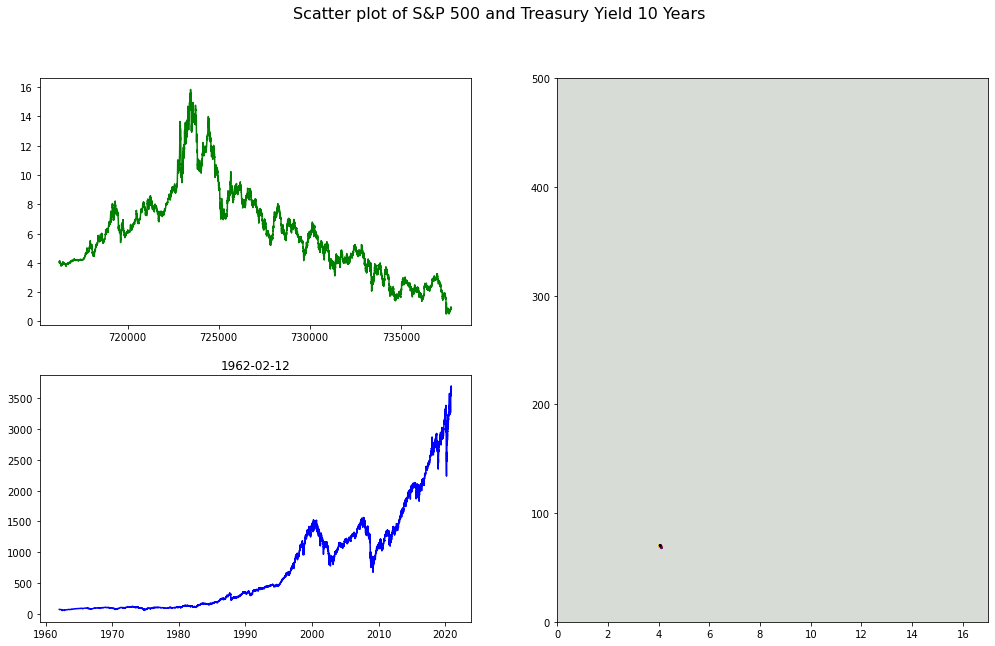

In [17]:
scale = {0: 100, 2000: 100, 4000: 250, 6000: 500, 8000: 1600, 10000: 1600, 12000: 2500, 14000: 3800}
scale_y = 100
win = 30


for i in (10, 1000, 1480):
    fig, ax = plt.subplots(nrows=2, ncols=2)
    fig.set_size_inches(20, 10)
    ax0 = plt.subplot2grid((2, 2), (0, 0))
    ax1 = plt.subplot2grid((2, 2), (0, 1), rowspan=2)
    ax2 = plt.subplot2grid((2, 2), (1, 0))
    fig.subplots_adjust(wspace=0.1)
#     fig.subplots_adjust(hspace=0.1)
    
    ax0.plot(df.tr, color='g')
    ax0.plot(df.tr[i-win:i+win], color='r', linewidth=4.0)
    fig.suptitle('Scatter plot of S&P 500 and Treasury Yield 10 Years', fontsize=16)
    
    ax2.plot(df.sp, color='b')
    ax2.plot(df.sp[i-win:i+win], color='r', linewidth=4.0)
    ax2.set_title(f'{df.Date[i]}')
    
    x = df.tr[:i]
    y = df.sp[:i]
    z = df.index[:i].astype('int')/df.index[:i].astype('int').max()
    
#     xm = np.mean(x)
#     ym = np.mean(y)
#     R = (np.sum((x - xm)*(y - ym)))/((np.sum((x - xm)**2)*np.sum((y - ym)**2))**(1/2))
#     a = (np.sum(x)*np.sum(y) - len(x)*np.sum(x*y))/(np.sum(x)*np.sum(x) - len(x)*np.sum(x*x))
#     b = (np.sum(y) - a*np.sum(x))/len(x)
    ax1.set_facecolor('xkcd:grey')
    color = [float(item) for item in z]
    ax1.scatter(x, y, s=2, c=color, cmap='inferno')
    ax1.set_xlim([0, 17])
    if i%2000 == 0:
        scale_y = scale[i]
    ax1.set_ylim([0, scale_y])
#     ax1.plot([0, 1], [b, a + b], c='r')
    
    plt.savefig('E:/Temp/hist/{:04d}.png'.format(i))
    plt.clf()
    plt.close('all')